# Homework 1: A sinister homework

By the end of this homework, we expect you to be able to:

1. Load data and handle data using pandas;
2. Navigate the documentation of Python packages by yourself;
3. Filter and tidy up noisy real-world datasets;
4. Aggregate your data in different (and hopefully helpful) ways;
5. Create meaningful visualizations to analyze the data;
6. Communicate your findings in a clear and concise manner


---

## Important Dates
- Homework release: Fri 13 Oct 2023
- **Homework due:** Fri 27 Oct 2023, 23:59
- Grade release: Mon 06 Nov 2023

---

## Some rules
1. You are allowed to use any built-in Python library that comes with Anaconda. If you want to use an external library, you may do so, but must justify your choice.

2. Make sure you use the `data` folder provided in the repository in read-only mode. (Or alternatively, be sure you don’t change any of the files.)

3. Be sure to provide a concise textual description of your thought process, the assumptions you made, the solution you implemented, and explanations for your answers. A notebook that only has code cells will not suffice.

4. For questions containing the **/Discuss:/** prefix, answer not with code, but with a textual explanation **(in markdown)**.

5. Back up any hypotheses and claims with data, since this is an important aspect of the course.

6. Please write all your comments in **English**, and use meaningful variable names in your code. Your repo should have a single notebook (plus the required data files) in the master/main branch. **If there are multiple notebooks present, we will not grade anything.**

7. We will **not run your notebook for you!** Rather, we will grade it as is, which means that only the results contained in your evaluated code cells will be considered, and we will not see the results in unevaluated code cells. Thus, be sure to hand in a **fully-run and evaluated notebook**. In order to check whether everything looks as intended, you can check the rendered notebook on the GitHub website once you have pushed your solution there.

8. In continuation to the previous point, interactive plots, such as those generated using the `plotly` package, should be strictly avoided!

9. Make sure to print results and/or dataframes that confirm you have properly addressed the task.


---

##  Context

Congratulations! You have just been hired as a data scientist at "The ByteBlasters", EPFL’s amateur baseball club. The team's manager, Mr. Russo, an eccentric millionaire with an innovative plan to dominate the Swiss baseball league, believes hiring left-handed pitchers (the people who throw the ball) will likely boost the team's performance. Yet, he is concerned about money, as he heard left-handed pitchers have historically earned more!

He tasked you to investigate this "sinister" issue and gave you some openly available data on the birthplace of this beautiful, dynamic sport --- the US.

**About the homework.** This homework consists of four tasks. In Task 0, you will familiarize yourself with the rules of baseball. In Task 1, you will process the data, getting it ready for analysis. In Task 2, you will analyze the data to answer Mr. Russo’s question. Lastly, in Task 3, you will conduct additional analyses that consider the longitudinal nature of the data.

In [47]:
import scipy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import YouTubeVideo
import os
import seaborn as sns



# Task 0 (Ungraded): Baseball 101

**0.1 —** Familiarize yourself with the data; we won't explain the data in-depth in this notebook. Instead, you should take your time to read the readme.txt file inside the data folder. Note that this data is available on [GitHub](https://github.com/chadwickbureau/baseballdatabank).

**0.2 —** Familiarize yourself with basic baseball rules. We will explain everything you need to know, but it will be helpful to get a basic understanding of it. Watching the video below should be enough! (Also available [here](https://www.youtube.com/watch?v=WMA8L5OpuDY).)

A couple of useful things to remember:
- **Pitchers** (try to) throw the ball
- **Batters** (try to) hit the ball with the bat
- **Catchers** (try to) catch the ball.


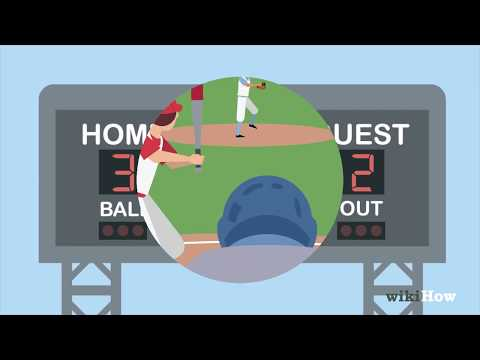

In [48]:
YouTubeVideo('WMA8L5OpuDY', width=800, height=300)

In [49]:
path = "./data"+"./baseballdatabank-2023"+"./contrib"

---

# Task 1 (16 pts): Get to Know Your Data

As a good data scientist, you first load the data and perform some small sanity checks on it.

1. You are expected to continuously alter your dataframe as you complete the tasks. E.g., if you are asked to filter the data in a specific task, continue using the filtered dataset in the subsequent tasks.
2. When we tell you to "print the dataframe," make sure you print it in a way that shows the total number of rows and columns in it (`display(df)` should suffice).

---

**1.1 —** Load the `People`, `Salaries`, and `Pitching` dataframes. Then:
- Filter the `Salaries`, and `Pitching` dataframes to remove all data after the year 2010.
- For the `Salaries` dataframe drop all duplicate salaries for players in a given year. In other words, if a player (uniquely identified by `PlayerID`) has multiple salaries in a year (`yearID`), keep the first occurence in the dataframe and drop the remaining.
- Calculate the size of each dataframe. 

Make [deep copies](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.copy.html) of all dataframes as you filter them.

Hints:
- 2007 should be included in the data.
- 2010 should be included in the data.
- 2011 should not be included in the data.

In [50]:
path_contrib = "./data"+"/baseballdatabank-2023"+"/contrib"
path_core = "./data"+"/baseballdatabank-2023"+"/core"
salaries = pd.read_csv(os.path.join(path_contrib, "Salaries.csv"))
people = pd.read_csv(os.path.join(path_core, "People.csv"))
pitching = pd.read_csv(os.path.join(path_core, "Pitching.csv"))

In [51]:
salaries_filtered = salaries.copy()
pitching_filtered = pitching.copy()
salaries_filtered = salaries_filtered.loc[salaries_filtered["yearID"]<= 2010]
pitching_filtered = pitching_filtered.loc[pitching_filtered["yearID"]<=2010]
display(salaries_filtered)
display(pitching_filtered)

,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000
...,...,...,...,...,...
21449,2010,WAS,NL,walkety01,650000
21450,2010,WAS,NL,wangch01,2000000
21451,2010,WAS,NL,willijo03,4600000
21452,2010,WAS,NL,zimmejo01,401000


,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
0,bechtge01,1871,1,PH1,NaN,1,2,3,3,2,0,0,78,43,23,0,11,1,NaN,7.96,NaN,7,NaN,0,146.0,0,42,NaN,NaN,NaN
1,brainas01,1871,1,WS3,NaN,12,15,30,30,30,0,0,792,361,132,4,37,13,NaN,4.50,NaN,7,NaN,0,1291.0,0,292,NaN,NaN,NaN
2,fergubo01,1871,1,NY2,NaN,0,0,1,0,0,0,0,3,8,3,0,0,0,NaN,27.00,NaN,2,NaN,0,14.0,0,9,NaN,NaN,NaN
3,fishech01,1871,1,RC1,NaN,4,16,24,24,22,1,0,639,295,103,3,31,15,NaN,4.35,NaN,20,NaN,0,1080.0,1,257,NaN,NaN,NaN
4,fleetfr01,1871,1,NY2,NaN,0,1,1,1,1,0,0,27,20,10,0,3,0,NaN,10.00,NaN,0,NaN,0,57.0,0,21,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40428,zambrca01,2010,1,CHN,NL,11,6,36,20,0,0,0,389,119,48,7,69,117,0.246,3.33,0.0,7,6.0,1,571.0,2,55,9.0,3.0,14.0
40429,zieglbr01,2010,1,OAK,AL,3,7,64,0,0,0,0,182,54,22,4,28,41,0.241,3.26,9.0,0,3.0,1,257.0,12,24,1.0,1.0,8.0
40430,zimmejo02,2010,1,WAS,NL,1,2,7,7,0,0,0,93,31,17,8,10,27,0.256,4.94,1.0,0,2.0,0,135.0,0,20,1.0,1.0,1.0
40431,zitoba01,2010,1,SFN,NL,9,14,34,33,1,0,0,598,184,92,20,84,150,0.250,4.15,7.0,7,7.0,0,848.0,1,97,13.0,7.0,17.0


In [52]:
salaries_filtered = salaries_filtered.drop_duplicates(subset=["playerID", "yearID"])
display(salaries_filtered)
#Now we have a dataframe with for each player one salary for every year

,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000
...,...,...,...,...,...
21449,2010,WAS,NL,walkety01,650000
21450,2010,WAS,NL,wangch01,2000000
21451,2010,WAS,NL,willijo03,4600000
21452,2010,WAS,NL,zimmejo01,401000


In [53]:
display(people)

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,deathCountry,deathState,deathCity,nameFirst,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,NaN,NaN,NaN,David,Aardsma,David Allan,215.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01
1,aaronha01,1934.0,2.0,5.0,USA,AL,Mobile,2021.0,1.0,22.0,USA,GA,Atlanta,Hank,Aaron,Henry Louis,180.0,72.0,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01
2,aaronto01,1939.0,8.0,5.0,USA,AL,Mobile,1984.0,8.0,16.0,USA,GA,Atlanta,Tommie,Aaron,Tommie Lee,190.0,75.0,R,R,1962-04-10,1971-09-26,aarot101,aaronto01
3,aasedo01,1954.0,9.0,8.0,USA,CA,Orange,NaN,NaN,NaN,NaN,NaN,NaN,Don,Aase,Donald William,190.0,75.0,R,R,1977-07-26,1990-10-03,aased001,aasedo01
4,abadan01,1972.0,8.0,25.0,USA,FL,Palm Beach,NaN,NaN,NaN,NaN,NaN,NaN,Andy,Abad,Fausto Andres,184.0,73.0,L,L,2001-09-10,2006-04-13,abada001,abadan01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20671,zupofr01,1939.0,8.0,29.0,USA,CA,San Francisco,2005.0,3.0,25.0,USA,CA,Burlingame,Frank,Zupo,Frank Joseph,182.0,71.0,L,R,1957-07-01,1961-05-09,zupof101,zupofr01
20672,zuvelpa01,1958.0,10.0,31.0,USA,CA,San Mateo,NaN,NaN,NaN,NaN,NaN,NaN,Paul,Zuvella,Paul,173.0,72.0,R,R,1982-09-04,1991-05-02,zuvep001,zuvelpa01
20673,zuverge01,1924.0,8.0,20.0,USA,MI,Holland,2014.0,9.0,8.0,USA,AZ,Tempe,George,Zuverink,George,195.0,76.0,R,R,1951-04-21,1959-06-15,zuveg101,zuverge01
20674,zwilldu01,1888.0,11.0,2.0,USA,MO,St. Louis,1978.0,3.0,27.0,USA,CA,La Crescenta,Dutch,Zwilling,Edward Harrison,160.0,66.0,L,L,1910-08-14,1916-07-12,zwild101,zwilldu01


people_filtered = people.copy()
#Let's analyze first all the possible result in the throws columns 
people_filtered["throws"].unique()**1.2 —** The `throws` column in the `People` dataframe indicates, for each player, whether they throw with the left ("L") or right hand ("R"). Check what values are in the column and drop rows containing any value that is not "L" or "R," again, make a deep copy when you filter the dataframe.

Hint: Remember NaNs!

In [54]:
people_filtered = people.copy()
#Let's analyze first all the possible result in the throws columns 
people_filtered["throws"].unique()

array(['R', 'L', nan, 'S'], dtype=object)

In [55]:
#We can see that we have nan and "S" results which we dont want, so let's remove them.
people_filtered = people_filtered.loc[(people_filtered["throws"]=="R") | (people_filtered["throws"] == "L")]
#We can now check if we were able to keep only the rows containing "R" and "L"
people_filtered["throws"].unique()

array(['R', 'L'], dtype=object)

In [56]:
display(people_filtered)

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,deathCountry,deathState,deathCity,nameFirst,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,NaN,NaN,NaN,David,Aardsma,David Allan,215.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01
1,aaronha01,1934.0,2.0,5.0,USA,AL,Mobile,2021.0,1.0,22.0,USA,GA,Atlanta,Hank,Aaron,Henry Louis,180.0,72.0,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01
2,aaronto01,1939.0,8.0,5.0,USA,AL,Mobile,1984.0,8.0,16.0,USA,GA,Atlanta,Tommie,Aaron,Tommie Lee,190.0,75.0,R,R,1962-04-10,1971-09-26,aarot101,aaronto01
3,aasedo01,1954.0,9.0,8.0,USA,CA,Orange,NaN,NaN,NaN,NaN,NaN,NaN,Don,Aase,Donald William,190.0,75.0,R,R,1977-07-26,1990-10-03,aased001,aasedo01
4,abadan01,1972.0,8.0,25.0,USA,FL,Palm Beach,NaN,NaN,NaN,NaN,NaN,NaN,Andy,Abad,Fausto Andres,184.0,73.0,L,L,2001-09-10,2006-04-13,abada001,abadan01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20671,zupofr01,1939.0,8.0,29.0,USA,CA,San Francisco,2005.0,3.0,25.0,USA,CA,Burlingame,Frank,Zupo,Frank Joseph,182.0,71.0,L,R,1957-07-01,1961-05-09,zupof101,zupofr01
20672,zuvelpa01,1958.0,10.0,31.0,USA,CA,San Mateo,NaN,NaN,NaN,NaN,NaN,NaN,Paul,Zuvella,Paul,173.0,72.0,R,R,1982-09-04,1991-05-02,zuvep001,zuvelpa01
20673,zuverge01,1924.0,8.0,20.0,USA,MI,Holland,2014.0,9.0,8.0,USA,AZ,Tempe,George,Zuverink,George,195.0,76.0,R,R,1951-04-21,1959-06-15,zuveg101,zuverge01
20674,zwilldu01,1888.0,11.0,2.0,USA,MO,St. Louis,1978.0,3.0,27.0,USA,CA,La Crescenta,Dutch,Zwilling,Edward Harrison,160.0,66.0,L,L,1910-08-14,1916-07-12,zwild101,zwilldu01


**1.3 —** Merge the `People` dataframe with the `Pitching` dataframe. Your merge should populate the pitching data with statistics about the players. Print the resulting dataframe.

In [57]:
pitching_people = pd.merge(people_filtered, pitching_filtered, on="playerID", how="outer")
pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns',100)

display(pitching_people)

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,deathCountry,deathState,deathCity,nameFirst,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,NaN,NaN,NaN,David,Aardsma,David Allan,215.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01,2004.0,1.0,SFN,NL,1.0,0.0,11.0,0.0,0.0,0.0,0.0,32.0,20.0,8.0,1.0,10.0,5.0,0.417,6.75,0.0,0.0,2.0,0.0,61.0,5.0,8.0,0.0,1.0,1.0
1,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,NaN,NaN,NaN,David,Aardsma,David Allan,215.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01,2006.0,1.0,CHN,NL,3.0,0.0,45.0,0.0,0.0,0.0,0.0,159.0,41.0,24.0,9.0,28.0,49.0,0.214,4.08,0.0,1.0,1.0,0.0,225.0,9.0,25.0,1.0,3.0,2.0
2,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,NaN,NaN,NaN,David,Aardsma,David Allan,215.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01,2007.0,1.0,CHA,AL,2.0,1.0,25.0,0.0,0.0,0.0,0.0,97.0,39.0,23.0,4.0,17.0,36.0,0.300,6.40,3.0,2.0,1.0,0.0,151.0,7.0,24.0,2.0,1.0,1.0
3,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,NaN,NaN,NaN,David,Aardsma,David Allan,215.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01,2008.0,1.0,BOS,AL,4.0,2.0,47.0,0.0,0.0,0.0,0.0,146.0,49.0,30.0,4.0,35.0,49.0,0.268,5.55,2.0,3.0,5.0,0.0,228.0,7.0,32.0,3.0,2.0,4.0
4,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,NaN,NaN,NaN,David,Aardsma,David Allan,215.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01,2009.0,1.0,SEA,AL,3.0,6.0,73.0,0.0,0.0,0.0,38.0,214.0,49.0,20.0,4.0,34.0,80.0,0.190,2.52,3.0,2.0,0.0,0.0,296.0,53.0,23.0,2.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51931,holmeji01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1906.0,1.0,PHA,AL,0.0,1.0,3.0,1.0,0.0,0.0,0.0,27.0,10.0,4.0,0.0,8.0,1.0,NaN,4.00,NaN,0.0,1.0,0.0,44.0,0.0,11.0,NaN,NaN,NaN
51932,holmeji01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1908.0,1.0,BRO,NL,1.0,3.0,13.0,1.0,1.0,0.0,0.0,120.0,37.0,15.0,0.0,20.0,10.0,NaN,3.38,NaN,3.0,3.0,0.0,160.0,10.0,19.0,NaN,NaN,NaN
51933,merceja01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1910.0,1.0,PIT,NL,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,2.0,1.0,NaN,0.00,NaN,0.0,0.0,0.0,4.0,1.0,0.0,NaN,NaN,NaN
51934,pattoha01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1910.0,1.0,SLN,NL,0.0,0.0,1.0,0.0,0.0,0.0,0.0,12.0,4.0,1.0,0.0,2.0,2.0,NaN,2.25,NaN,0.0,0.0,0.0,17.0,1.0,2.0,NaN,NaN,NaN


**1.4 —** You realize some of the data for the `throws` column is missing! Estimate the percentage of missing data points per year in that column, and show your estimates in a line plot. Additionally, print what percentage of the data was missing in 1892.

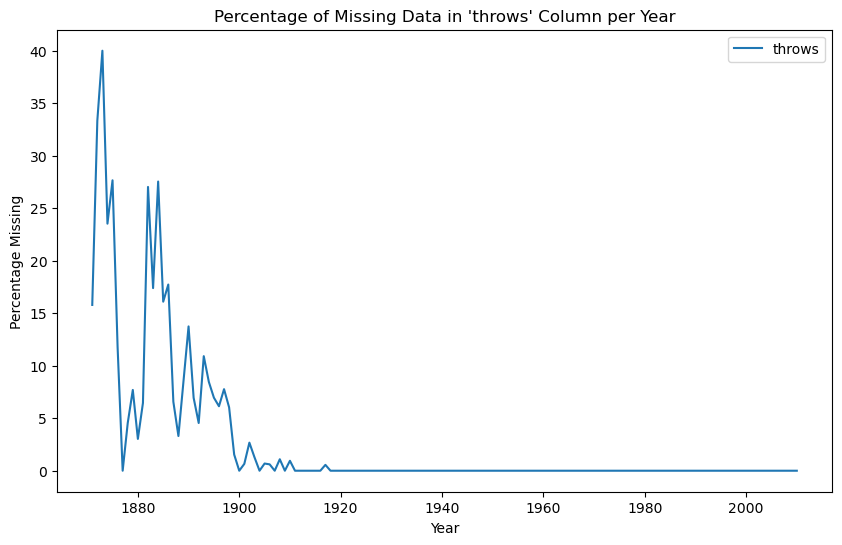

In [58]:
missing_percentage = pitching_people
missing_percentage = missing_percentage.groupby("yearID")["throws"].apply(lambda x: (x.isna().sum()/len(x))*100)
plt.figure(figsize=(10, 6))
missing_percentage.plot(legend=True)
plt.title("Percentage of Missing Data in 'throws' Column per Year")
plt.xlabel("Year")
plt.ylabel("Percentage Missing")

# Show the plot
plt.show()

In [59]:
missing_percentage_1892 = missing_percentage.get(1892, 0)
print(f"Percentage of missing data in 1892: {missing_percentage_1892:.2f}%")

Percentage of missing data in 1892: 4.55%


**1.5 —** Filter the dataset you just merged (hereinafter `Pitching-People`) to just contain data from after 1920 (with 1920 included). Do the same with the `Salaries` dataset. Make deep copies of both dataframes as you filter them.



In [60]:
merged_filtered = pitching_people.copy()
merged_filtered = merged_filtered.loc[merged_filtered["yearID"] >= 1920]
display(merged_filtered)

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,deathCountry,deathState,deathCity,nameFirst,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,NaN,NaN,NaN,David,Aardsma,David Allan,215.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01,2004.0,1.0,SFN,NL,1.0,0.0,11.0,0.0,0.0,0.0,0.0,32.0,20.0,8.0,1.0,10.0,5.0,0.417,6.75,0.0,0.0,2.0,0.0,61.0,5.0,8.0,0.0,1.0,1.0
1,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,NaN,NaN,NaN,David,Aardsma,David Allan,215.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01,2006.0,1.0,CHN,NL,3.0,0.0,45.0,0.0,0.0,0.0,0.0,159.0,41.0,24.0,9.0,28.0,49.0,0.214,4.08,0.0,1.0,1.0,0.0,225.0,9.0,25.0,1.0,3.0,2.0
2,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,NaN,NaN,NaN,David,Aardsma,David Allan,215.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01,2007.0,1.0,CHA,AL,2.0,1.0,25.0,0.0,0.0,0.0,0.0,97.0,39.0,23.0,4.0,17.0,36.0,0.300,6.40,3.0,2.0,1.0,0.0,151.0,7.0,24.0,2.0,1.0,1.0
3,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,NaN,NaN,NaN,David,Aardsma,David Allan,215.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01,2008.0,1.0,BOS,AL,4.0,2.0,47.0,0.0,0.0,0.0,0.0,146.0,49.0,30.0,4.0,35.0,49.0,0.268,5.55,2.0,3.0,5.0,0.0,228.0,7.0,32.0,3.0,2.0,4.0
4,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,NaN,NaN,NaN,David,Aardsma,David Allan,215.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01,2009.0,1.0,SEA,AL,3.0,6.0,73.0,0.0,0.0,0.0,38.0,214.0,49.0,20.0,4.0,34.0,80.0,0.190,2.52,3.0,2.0,0.0,0.0,296.0,53.0,23.0,2.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51598,zuverge01,1924.0,8.0,20.0,USA,MI,Holland,2014.0,9.0,8.0,USA,AZ,Tempe,George,Zuverink,George,195.0,76.0,R,R,1951-04-21,1959-06-15,zuveg101,zuverge01,1955.0,2.0,BAL,AL,4.0,3.0,28.0,5.0,0.0,0.0,4.0,259.0,80.0,21.0,5.0,17.0,31.0,0.260,2.19,1.0,2.0,4.0,0.0,333.0,16.0,28.0,NaN,NaN,NaN
51599,zuverge01,1924.0,8.0,20.0,USA,MI,Holland,2014.0,9.0,8.0,USA,AZ,Tempe,George,Zuverink,George,195.0,76.0,R,R,1951-04-21,1959-06-15,zuveg101,zuverge01,1956.0,1.0,BAL,AL,7.0,6.0,62.0,0.0,0.0,0.0,16.0,292.0,112.0,45.0,6.0,34.0,33.0,0.290,4.16,9.0,1.0,3.0,1.0,432.0,40.0,52.0,NaN,NaN,NaN
51600,zuverge01,1924.0,8.0,20.0,USA,MI,Holland,2014.0,9.0,8.0,USA,AZ,Tempe,George,Zuverink,George,195.0,76.0,R,R,1951-04-21,1959-06-15,zuveg101,zuverge01,1957.0,1.0,BAL,AL,10.0,6.0,56.0,0.0,0.0,0.0,9.0,338.0,105.0,31.0,9.0,39.0,36.0,0.250,2.48,13.0,1.0,4.0,0.0,475.0,37.0,37.0,NaN,NaN,NaN
51601,zuverge01,1924.0,8.0,20.0,USA,MI,Holland,2014.0,9.0,8.0,USA,AZ,Tempe,George,Zuverink,George,195.0,76.0,R,R,1951-04-21,1959-06-15,zuveg101,zuverge01,1958.0,1.0,BAL,AL,2.0,2.0,45.0,0.0,0.0,0.0,7.0,207.0,74.0,26.0,4.0,17.0,22.0,0.280,3.39,3.0,2.0,6.0,0.0,294.0,23.0,29.0,NaN,NaN,NaN


In [61]:
salaries_filteredyear = salaries_filtered.copy()
salaries_filteredyear = salaries_filteredyear.loc[salaries_filteredyear["yearID"]>=1920]
display(salaries_filteredyear)

,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000
...,...,...,...,...,...
21449,2010,WAS,NL,walkety01,650000
21450,2010,WAS,NL,wangch01,2000000
21451,2010,WAS,NL,willijo03,4600000
21452,2010,WAS,NL,zimmejo01,401000


**1.6 —**  Merge the `Pitching-People` dataframe with the `Salaries` dataframe. Your merge should populate the `Pitching-People` dataframe with statistics about the pitchers'salaries across the years. Note that the `Salaries` dataframe contains the salary **per year.** Print the resulting dataframe.

In [62]:
#Before merging the two dataframw we need to remove the duplicate salaries in the pitching_people frame
pitching_people_filtered = merged_filtered.drop_duplicates(subset=["playerID", "yearID"])
display(pitching_people_filtered)

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,deathCountry,deathState,deathCity,nameFirst,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,NaN,NaN,NaN,David,Aardsma,David Allan,215.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01,2004.0,1.0,SFN,NL,1.0,0.0,11.0,0.0,0.0,0.0,0.0,32.0,20.0,8.0,1.0,10.0,5.0,0.417,6.75,0.0,0.0,2.0,0.0,61.0,5.0,8.0,0.0,1.0,1.0
1,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,NaN,NaN,NaN,David,Aardsma,David Allan,215.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01,2006.0,1.0,CHN,NL,3.0,0.0,45.0,0.0,0.0,0.0,0.0,159.0,41.0,24.0,9.0,28.0,49.0,0.214,4.08,0.0,1.0,1.0,0.0,225.0,9.0,25.0,1.0,3.0,2.0
2,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,NaN,NaN,NaN,David,Aardsma,David Allan,215.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01,2007.0,1.0,CHA,AL,2.0,1.0,25.0,0.0,0.0,0.0,0.0,97.0,39.0,23.0,4.0,17.0,36.0,0.300,6.40,3.0,2.0,1.0,0.0,151.0,7.0,24.0,2.0,1.0,1.0
3,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,NaN,NaN,NaN,David,Aardsma,David Allan,215.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01,2008.0,1.0,BOS,AL,4.0,2.0,47.0,0.0,0.0,0.0,0.0,146.0,49.0,30.0,4.0,35.0,49.0,0.268,5.55,2.0,3.0,5.0,0.0,228.0,7.0,32.0,3.0,2.0,4.0
4,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,NaN,NaN,NaN,David,Aardsma,David Allan,215.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01,2009.0,1.0,SEA,AL,3.0,6.0,73.0,0.0,0.0,0.0,38.0,214.0,49.0,20.0,4.0,34.0,80.0,0.190,2.52,3.0,2.0,0.0,0.0,296.0,53.0,23.0,2.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51597,zuverge01,1924.0,8.0,20.0,USA,MI,Holland,2014.0,9.0,8.0,USA,AZ,Tempe,George,Zuverink,George,195.0,76.0,R,R,1951-04-21,1959-06-15,zuveg101,zuverge01,1955.0,1.0,DET,AL,0.0,5.0,14.0,1.0,0.0,0.0,0.0,85.0,38.0,22.0,6.0,14.0,13.0,0.300,6.99,3.0,0.0,1.0,0.0,141.0,6.0,27.0,NaN,NaN,NaN
51599,zuverge01,1924.0,8.0,20.0,USA,MI,Holland,2014.0,9.0,8.0,USA,AZ,Tempe,George,Zuverink,George,195.0,76.0,R,R,1951-04-21,1959-06-15,zuveg101,zuverge01,1956.0,1.0,BAL,AL,7.0,6.0,62.0,0.0,0.0,0.0,16.0,292.0,112.0,45.0,6.0,34.0,33.0,0.290,4.16,9.0,1.0,3.0,1.0,432.0,40.0,52.0,NaN,NaN,NaN
51600,zuverge01,1924.0,8.0,20.0,USA,MI,Holland,2014.0,9.0,8.0,USA,AZ,Tempe,George,Zuverink,George,195.0,76.0,R,R,1951-04-21,1959-06-15,zuveg101,zuverge01,1957.0,1.0,BAL,AL,10.0,6.0,56.0,0.0,0.0,0.0,9.0,338.0,105.0,31.0,9.0,39.0,36.0,0.250,2.48,13.0,1.0,4.0,0.0,475.0,37.0,37.0,NaN,NaN,NaN
51601,zuverge01,1924.0,8.0,20.0,USA,MI,Holland,2014.0,9.0,8.0,USA,AZ,Tempe,George,Zuverink,George,195.0,76.0,R,R,1951-04-21,1959-06-15,zuveg101,zuverge01,1958.0,1.0,BAL,AL,2.0,2.0,45.0,0.0,0.0,0.0,7.0,207.0,74.0,26.0,4.0,17.0,22.0,0.280,3.39,3.0,2.0,6.0,0.0,294.0,23.0,29.0,NaN,NaN,NaN


In [63]:
pitching_people_salaries = pd.merge(pitching_people_filtered,salaries_filteredyear,on=["playerID","yearID"],how="outer")
display(pitching_people_salaries)

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,deathCountry,deathState,deathCity,nameFirst,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID,yearID,stint,teamID_x,lgID_x,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP,teamID_y,lgID_y,salary
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,NaN,NaN,NaN,David,Aardsma,David Allan,215.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01,2004.0,1.0,SFN,NL,1.0,0.0,11.0,0.0,0.0,0.0,0.0,32.0,20.0,8.0,1.0,10.0,5.0,0.417,6.75,0.0,0.0,2.0,0.0,61.0,5.0,8.0,0.0,1.0,1.0,SFN,NL,300000.0
1,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,NaN,NaN,NaN,David,Aardsma,David Allan,215.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01,2006.0,1.0,CHN,NL,3.0,0.0,45.0,0.0,0.0,0.0,0.0,159.0,41.0,24.0,9.0,28.0,49.0,0.214,4.08,0.0,1.0,1.0,0.0,225.0,9.0,25.0,1.0,3.0,2.0,NaN,NaN,NaN
2,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,NaN,NaN,NaN,David,Aardsma,David Allan,215.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01,2007.0,1.0,CHA,AL,2.0,1.0,25.0,0.0,0.0,0.0,0.0,97.0,39.0,23.0,4.0,17.0,36.0,0.300,6.40,3.0,2.0,1.0,0.0,151.0,7.0,24.0,2.0,1.0,1.0,CHA,AL,387500.0
3,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,NaN,NaN,NaN,David,Aardsma,David Allan,215.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01,2008.0,1.0,BOS,AL,4.0,2.0,47.0,0.0,0.0,0.0,0.0,146.0,49.0,30.0,4.0,35.0,49.0,0.268,5.55,2.0,3.0,5.0,0.0,228.0,7.0,32.0,3.0,2.0,4.0,BOS,AL,403250.0
4,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,NaN,NaN,NaN,David,Aardsma,David Allan,215.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01,2009.0,1.0,SEA,AL,3.0,6.0,73.0,0.0,0.0,0.0,38.0,214.0,49.0,20.0,4.0,34.0,80.0,0.190,2.52,3.0,2.0,0.0,0.0,296.0,53.0,23.0,2.0,1.0,2.0,SEA,AL,419000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43145,rodriiv01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WAS,NL,3000000.0
43146,wangch01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WAS,NL,2000000.0
43147,willijo03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WAS,NL,4600000.0
43148,zimmejo01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WAS,NL,401000.0


**1.7 —** You realize some of the data for the `salary` column is missing! Estimate the percentage of missing data points per year, and show your estimates in a line plot. Additionally, print what percentage of the data was missing in 2002.


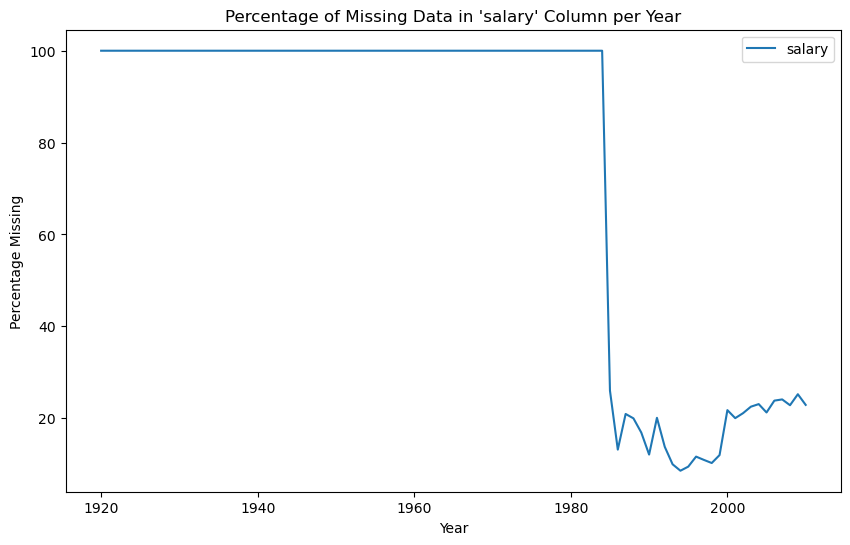

In [64]:
missing_percentage_salaries = pitching_people_salaries.groupby("yearID")["salary"].apply(lambda x: (x.isna().sum()/len(x))*100)
plt.figure(figsize=(10, 6))
missing_percentage_salaries.plot(legend=True)
plt.title("Percentage of Missing Data in 'salary' Column per Year")
plt.xlabel("Year")
plt.ylabel("Percentage Missing")

# Show the plot
plt.show()


In [65]:
missing_percentage_salary_2002 = missing_percentage_salaries.get(2002, 0)
print(f"Percentage of missing data in 2002: {missing_percentage_salary_2002:.2f}%")

Percentage of missing data in 2002: 21.08%


**1.8 —** Find and print the first and last year for which there exists any salary data. Filter the resulting, merged dataframe to include only data between these two dates. Again make sure you make a deep copy of the dataframe, and print the resulting dataframe.

---

# Task 2 (16 pts)

Task 1, was a softball? Huh? For Task 2, you will use a dataset similar to what you obtained at the end of Task 1. This code loads it.


In [66]:
# PROVIDED CODE

df = pd.read_csv("./data/dataset-task-2.csv")
df.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,deathCountry,deathState,deathCity,nameFirst,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID,salary
0,prietar01,1998,1,OAK,AL,0,1,2,2,0,0,0,25,17,11,2,5,8,0.415,11.88,1.0,0,1.0,0,47.0,0,11,0.0,0.0,0.0,1969.0,10.0,22.0,Cuba,La Habana,La Habana,NaN,NaN,NaN,NaN,NaN,NaN,Ariel,Prieto,Ariel,220.0,75.0,R,R,1995-07-02,2001-05-10,priea001,prietar01,NaN
1,pooleji02,2000,1,DET,AL,1,0,18,0,0,0,0,26,13,7,4,1,5,0.361,7.27,0.0,0,1.0,0,41.0,1,8,1.0,2.0,0.0,1966.0,4.0,28.0,USA,NY,Rochester,NaN,NaN,NaN,NaN,NaN,NaN,Jim,Poole,James Richard,190.0,74.0,L,L,1990-06-15,2000-06-01,poolj001,pooleji02,200000.0
2,leecl02,2007,1,CLE,AL,5,8,20,16,1,0,0,292,112,68,17,36,66,0.284,6.29,1.0,5,7.0,0,443.0,1,73,3.0,2.0,7.0,1978.0,8.0,30.0,USA,AR,Benton,NaN,NaN,NaN,NaN,NaN,NaN,Cliff,Lee,Clifton Phifer,205.0,75.0,L,L,2002-09-15,2014-07-31,lee-c003,leecl02,3000000.0
3,purceda01,2010,1,TOR,AL,1,1,33,0,0,0,1,102,26,14,3,15,32,0.210,3.71,1.0,3,0.0,0,143.0,18,16,2.0,2.0,0.0,1982.0,4.0,22.0,USA,IL,St. Charles,NaN,NaN,NaN,NaN,NaN,NaN,David,Purcey,David Kent,245.0,77.0,L,L,2008-04-18,2013-09-20,purcd001,purceda01,NaN
4,gundeer01,1992,1,SEA,AL,2,1,9,0,0,0,0,28,12,9,1,5,2,0.324,8.68,3.0,0,1.0,2,45.0,4,12,0.0,2.0,0.0,1966.0,3.0,29.0,USA,OR,Portland,NaN,NaN,NaN,NaN,NaN,NaN,Eric,Gunderson,Eric Andrew,175.0,72.0,R,L,1990-04-11,2000-05-17,gunde001,gundeer01,NaN


Some comments about this dataset:
- This is a sample of the dataset obtained in Task 1. 
- Even if you  did everything correctly for Task 1, this dataframe would contain a different number of rows --- as it is a sample.
- This prevent that mistakes made in Task 1 cascade into Tasks 2 and 3.


With this data, you will proceed to investigate differences in the salaries and performance of left-handed and right-handed pitchers.

---

**2.1 —** Plot the Complementary cumulative distribution function (CCDF) of salary for left-handed and right-handed athletes. Consider data from all years.

### Approach<br>
  - Keep only the "throws" and "salary" columns. Why "throws" column? We assume that a player is right-handed if he is a right-handed pitcher and left-handed if he is left-handed pitcher
  - Drop the rows where no salary is entered
  - Separate the data for left-handed and right-handed players
  - For each group sort the salary in descending order
  - For plot we use plt.hist where we indicate that we want ccdf plot by passing the parameter cumulative=-1 
  - Add the legends, titles and labels


In [67]:
#Keep only the throws and salary columns
filtered_df = df[['throws','salary']]
#drop nan values from salary column
filtered_df = filtered_df.dropna(subset=['salary'])
#filter the right handed and left handed players
left_handed= filtered_df.loc[filtered_df['throws']=='L']
right_handed= filtered_df.loc[filtered_df['throws']=='R']
#sort the salaries in descending order for both left and right handed players
right_handed_salary = right_handed['salary'].sort_values(ascending=False)
left_handed_salary = left_handed['salary'].sort_values(ascending=False)

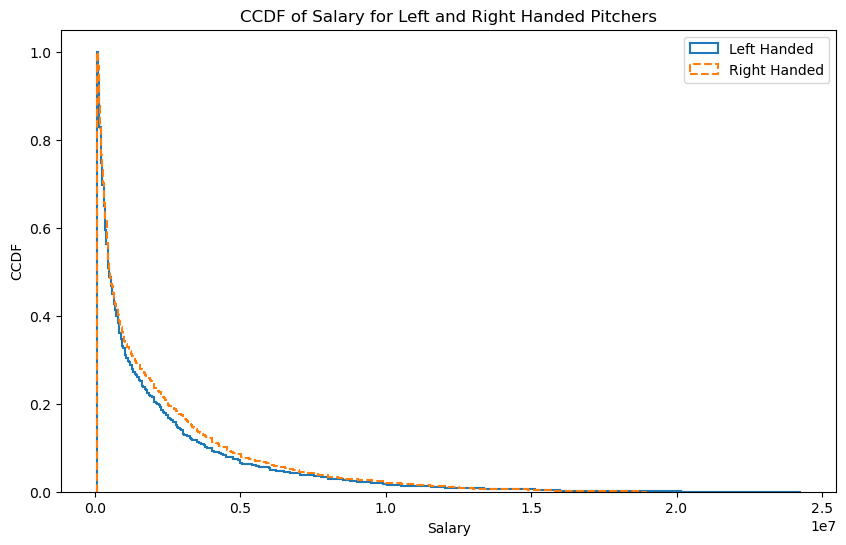

In [68]:
#creates a Matplotlib figure with one subplot and sets the size of the figure
fig, ax = plt.subplots(figsize=(10, 6))
#plot the CCDF of the salaries for both left and right handed players
withoutLog=ax.hist(left_handed_salary,density= True, bins=500,cumulative=-1, label='Left Handed',histtype='step', alpha=1, linewidth=1.5)
withoutLog=ax.hist(right_handed_salary,density=True, bins=500,cumulative=-1, label='Right Handed', histtype='step', alpha=1, linewidth=1.5, linestyle='--')
#set the x and y labels as well as the title
plt.legend(loc='upper right')
ax.set_xlabel('Salary')
ax.set_ylabel('CCDF')
plt.title("CCDF of Salary for Left and Right Handed Pitchers")
plt.show()


**2.2 —** /Discuss:/ This plot has an issue which severely limits the amount of information one can draw from it. Describe the issue and propose a solution to address it.

 The Complementary Cumulative Distribution Function plot of salaries is indicative of a power-law distribution, characterized by a long tail where a few high-income data points significantly dominate the distribution. However, the issue with this plot is that it makes it challenging to identify the details in the body of the distribution, particularly among higher and middle-income ranges. To address this issue, one possible solution is to plot the data on a on log scale on x-axis

**2.3 —** Implement the solution proposed by yourself in the previous question.

### Approach <br>
We proceed as 2.2 to plot, furthermore we adjust the x-axis scale to logarithmic

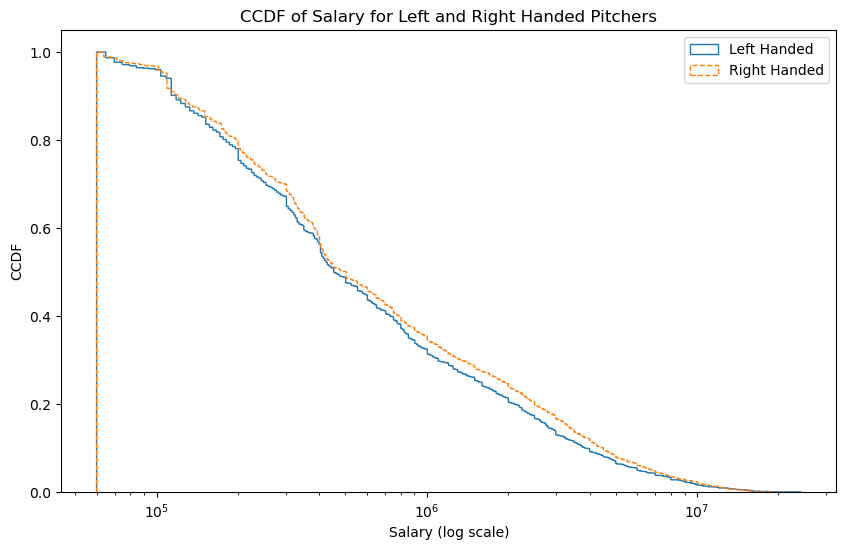

In [69]:
#We do as 2.2, furthermore we set x-axis scale to logaritmic
fig, ax = plt.subplots(figsize=(10, 6))
withoutLog=ax.hist(left_handed_salary,density= True, bins=5000,cumulative=-1, label='Left Handed',histtype='step', alpha=1)
withoutLog=ax.hist(right_handed_salary,density=True, bins=5000,cumulative=-1, label='Right Handed', histtype='step', alpha=1, linestyle='--')
plt.legend(loc='upper right')
plt.xscale('log')
ax.set_xlabel('Salary (log scale)')
ax.set_ylabel('CCDF')
plt.title("CCDF of Salary for Left and Right Handed Pitchers")
plt.show()

**2.4 —** /Discuss:/ Considering this second version of the plot, describe what the plot shows with regard to the distribution of salaries from left- and right-handed pitchers.

#### Utilizing a logarithmic scale effectively spreads out the data points along a wider range on the x-axis. Notably, the CCDF for left-handed players' salaries consistently lags slightly behind that of their right-handed counterparts. What's striking is the eventual convergence of both CCDFs toward the same value.

#### This convergence signifies that as we delve into the extreme high-end salaries, the disparities between the two groups become negligible. In essence, it suggests that salary fluctuations are nearly equal due to the close alignment of these curves. So, while right-handed pitchers tend to earn marginally more across various salary levels, this gap diminishes as we focus on the highest earning individuals, indicating a semblance in earning patterns for top performers in both groups.

**2.5—** Calculate the mean and the 95% confidence interval for the salary of left-handed and right-handed pitchers aggregating data across all years. Print the estimates. Additionally, present the estimates and the confidence intervals in a [point plot](https://seaborn.pydata.org/_images/pointplot_7_0.png). Calculate your confidence intervals using the standard error of the mean and ignoring missing values.

### Approach <br>
- Implement a function that computes the mean and CI (to avoid the repetition of code) and the implementation is done as follow:
  - Compute mean
  - Compute standard error by using scipy.stats.sem()
  - Compute the lower and upper bound of CI:
    - Lower_bound,upper_bound= mean -/+ standardError 
  - Return mean and CI
- Call the function for the salary of left and right-handed players
- Print the means and CIs
- Plot the means and CIs in point plot  

In [70]:
def  compute_mean_and_CI(data):
    '''Computes the mean and the CI
    
    Args:
    data (Panda Series): The data to compute the mean and CI
    
    
    return: 
    a tuple containing the mean (scalar) and the CI (tuple) of the data
    '''
    mean_ = np.mean(data)
    #compute the standard error using scipy.stats.sem
    std_err= scipy.stats.sem(data)
    #compute the lower and upper bound of the CI and store them in ci
    ci= mean_ - 1.96* std_err, mean_ + 1.96 * std_err
    return mean_, ci


In [71]:
#compute the mean and CI for the right handed pitcher and left handed pitcher
rh_mean, rh_ci = compute_mean_and_CI(right_handed_salary)
lh_mean, lh_ci = compute_mean_and_CI(left_handed_salary)
#print the estimates
print(f"Right handed pitcher mean salary: {rh_mean:.2f}")
print(f"Left handed pitcher mean salary: {lh_mean:.2f}")
#print the CIs
print(f"Right handed pitcher 95% confidence interval: {rh_ci}")
print(f"Left handed pitcher 95% confidence interval: {lh_ci}")


Right handed pitcher mean salary: 1597010.14
Left handed pitcher mean salary: 1437232.86
Right handed pitcher 95% confidence interval: (1539504.7185525214, 1654515.5533566577)
Left handed pitcher 95% confidence interval: (1352629.4685289203, 1521836.2541273297)


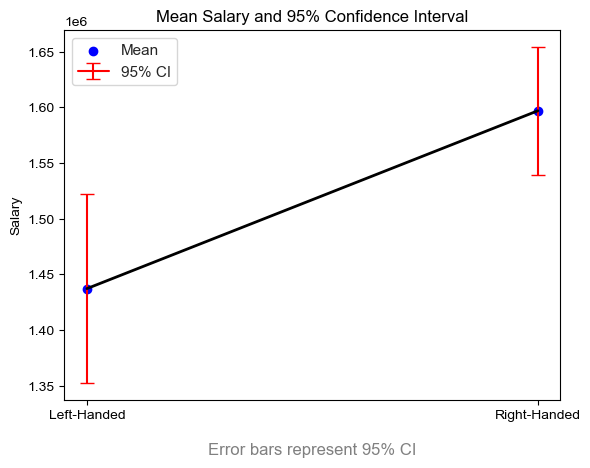

In [72]:
#Create a list containing the mean of the left handed pitcher and the right handed pitcher
means = [lh_mean, rh_mean]
#Create a list containing the CI of the left handed pitcher and the right handed pitcher
cis = [lh_ci,rh_ci]
#Create a list containing the labels of the left handed pitcher and the right handed pitcher
labels = ["Left-Handed","Right-Handed"]
#Create a figure and an axis
fig, ax = plt.subplots()
#Set the style to whitegrid
sns.set(style="whitegrid")
#Plot the mean of the left handed pitcher and the right handed pitcher
ax.scatter(labels, means, color='blue', marker='o', label='Mean')
#Plot the 95% CI of the left handed pitcher and the right handed pitcher
for i, ci in enumerate(cis):
    #Add the label only at the last iteration when the 95% CIs are plotted
    if i == len(cis)-1:
        label_= '95% CI'
    else:
        label_ = None
    ax.errorbar(labels[i], means[i], yerr=np.array([means[i] - ci[0], ci[1] - means[i]]).reshape(-1, 1), color='red', capsize=5, label=label_)
#Plot a line connecting the two means
ax.plot([labels[0], labels[1]], [lh_mean, rh_mean], color='black', linestyle='-', linewidth=2)
#Set the x and y labels as well as the title,annotation and legends
ax.set_ylabel('Salary')
ax.set_title('Mean Salary and 95% Confidence Interval')
plt.annotate('Error bars represent 95% CI', xy=(0.5, -0.15), xycoords='axes fraction', ha='center', fontsize=12, color='gray')
ax.legend()


**2.6 —** /Discuss:/ Can you tell whether the difference between the two distributions is statistically significant (at the .05 level of significance) from the image? Why?

#### In the provided Confidence Interval Error Bar chart, we can observe that the confidence intervals for the two distributions do not overlap. Furthermore, it's important to note that the means of these distributions are notably different, with left-handed players' salaries having a mean of 1.43e6 and right-handed players' salaries 1.60e6. This combination of non-overlapping confidence intervals and significant mean disparity leads to a compelling conclusion: the difference between the two salary distributions is statistically significant at the 0.05 level of significance, with a 95% confidence interval. According to this analysis, the observed difference is highly unlikely to be the result of random chance (p < 0.05).

**2.7 —** Perform a t-test test comparing the salaries of left-handed and right-handed pitchers at the .05 level of significance. Consider data from all years. /Discuss:/ Who earns more?

The approach to address this question involves conducting a t-test to compare the salaries of left-handed and right-handed pitchers. The significance level is set at 0.05, allowing us to assess whether the observed salary difference is statistically significant. If the calculated p-value is less than 0.05, it indicates a meaningful salary distinction between the groups. In contrast, a p-value above 0.05 suggests that there is insufficient evidence to conclude a significant difference, thus helping us determine which group, left-handed or right-handed pitchers, earns more on average based on the data.

In [73]:
import numpy as np
from scipy import stats

# Assuming you have salary data in left_handed_salary and right_handed_salary

# Perform an independent samples t-test
t_stat, p_value = stats.ttest_ind(left_handed_salary, right_handed_salary)

# Set the significance level (alpha) to 0.05
alpha = 0.05

# Check if the p-value is less than the significance level
if p_value < alpha:
    print("The difference in salaries is statistically significant.")
else:
    print("There is no statistically significant difference in salaries.")

# Print the p-value for reference
print("P_value: ", p_value)

The difference in salaries is statistically significant.
P_value:  0.0026128052505378957


#### This means that, according to the results of the t-test, there is strong evidence to suggest that there is a statistically significant difference in salaries between left-handed and right-handed pitchers. The p-value of approximately 0.0026 is significantly less than the significance level (alpha) of 0.05, indicating that the salary difference is not likely due to random chance. Thus, according to the given data right-handed players earn more than left-handed players.

---

Now, let's turn to analyzing performance. A commonly used metric to evaluate the skill of a pitcher is to look at the batting average of the pitcher’s opponents. According to [Wikipedia](https://en.wikipedia.org/wiki/Batting_average_against),

> In baseball statistics, batting average against (denoted by BAA or AVG), also known as opponents' batting average (denoted by OBA), is a statistic that measures a pitcher's ability to prevent hits during official at bats. It can alternatively be described as the league's hitters' combined batting average against the pitcher.

The intuition is clear: if you are a pitcher, you do not want the batter actually to hit the ball. Thus, if you are a good pitcher, the opponent batter should miss a lot against you! Conveniently, this is already calculated on a yearly basis in our data.

---

**2.8 —** Considering data from all years, calculate the mean opponents' batting average for left- and right-handed pitchers. Run a t-test test to determine if this difference is statistically significant at the .05 level of significance. **Consider only pitchers in the years during which they have played atleast 5 games.** /Discuss:/ According to this approach, who are the better pitchers? Left-handed or right-handed pitchers?

In [74]:
# Select the relevant columns ('BAOpp', 'G', 'throws') from the DataFrame and create a new DataFrame (BAOpp_df).
BAOpp_df = df[['BAOpp', 'G', 'throws']]

# Create a new DataFrame (right_BAOpp) containing data for right-handed pitchers.
right_BAOpp = BAOpp_df.loc[BAOpp_df['throws'] == 'R']

# Create a new DataFrame (left_BAOpp) containing data for left-handed pitchers.
left_BAOpp = BAOpp_df.loc[BAOpp_df['throws'] == 'L']

# Calculate the mean opponents' batting average for right-handed pitchers who have played at least 5 games ('G' >= 5).
mean_right_BAOpp = right_BAOpp[right_BAOpp['G'] >= 5]['BAOpp'].mean()

# Calculate the mean opponents' batting average for left-handed pitchers who have played at least 5 games ('G' >= 5).
mean_left_BAOpp = left_BAOpp[left_BAOpp['G'] >= 5]['BAOpp'].mean()

# Print the mean opponents' batting average for left-handed pitchers.
print("The mean opponents' batting average for left-handed pitchers is : ", mean_left_BAOpp)

# Print the mean opponents' batting average for right-handed pitchers.
print("The mean opponents' batting average for right-handed pitchers is : ", mean_right_BAOpp)

The mean opponents' batting average for left-handed pitchers is :  0.27038519285529383
The mean opponents' batting average for right-handed pitchers is :  0.2678352186208397


In [75]:
# Filter and extract opponents' batting average values for right-handed pitchers who have played at least 5 games ('G' >= 5).
right_BAOpp_values = right_BAOpp[right_BAOpp['G'] >= 5]['BAOpp']

# Filter and extract opponents' batting average values for left-handed pitchers who have played at least 5 games ('G' >= 5).
left_BAOpp_values = left_BAOpp[left_BAOpp['G'] >= 5]['BAOpp']

# Perform an independent samples t-test to compare the mean opponents' batting averages between left-handed and right-handed pitchers.
t_stat, p_value = stats.ttest_ind(left_BAOpp_values, right_BAOpp_values)

# Set the significance level (alpha) to 0.05.
alpha = 0.05

# Check if the p-value is less than the significance level.
if p_value < alpha:
    print("The difference is statistically significant.")
else:
    print("There is no statistically significant difference.")

# Print the p-value for reference.
print("P_value: ", p_value)

The difference is statistically significant.
P_value:  0.0059259316265533515


#### According to the t-test, the difference between opponents batting average for left-handed and right-handed pitchers is statistically significant. The p value is approximately 0.0059 which is significantly less than the significance level (alpha = 0.05), which lead us to reject the null hypothesis : both opponents' batting average are identical.

#### The mean for left-handed pitchers opponents batting average is slightly larger than the right-handed pitchers (0.27 > 0.26), thus left-handed pitchers would be less performant than right-handed pitchers

# Task 3 (18 pts)

Before you report your results to Mr. Russo, you decide to run them by your favorite Applied Data Analysis' TA, Ms. Sakota. She seems skeptical! According to her, you should take into account the time variable!

**3.1 —** Repeat the analysis from tasks 2.7 and 2.8 considering only data from the year 2000. That is, use a t-test to determine the distribution of salaries (2.7) and opponents' batting average (2.8) for all data of the year 2000 only. 

In [76]:
#Importing useful libraries
import statsmodels.stats.proportion
%matplotlib inline
import seaborn as sns
import math

#Loading the statistical libraries
from statsmodels.stats import diagnostic
from scipy import stats

In [77]:
#Filtering the data set to keep only data from the year 2000
df_2000 = df[df.yearID==2000]
np.shape(df_2000) #There are 655 rows for the dataframe restricted to the year 2000

(655, 54)

In [78]:
df_2000 #checking the values of the dataframe, especially the ones in the "salary" column

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,deathCountry,deathState,deathCity,nameFirst,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID,salary
1,pooleji02,2000,1,DET,AL,1,0,18,0,0,0,0,26,13,7,4,1,5,0.361,7.27,0.0,0,1.0,0,41.0,1,8,1.0,2.0,0.0,1966.0,4.0,28.0,USA,NY,Rochester,NaN,NaN,NaN,NaN,NaN,NaN,Jim,Poole,James Richard,190.0,74.0,L,L,1990-06-15,2000-06-01,poolj001,pooleji02,200000.0
5,holmeda01,2000,2,SLN,NL,0,1,5,0,0,0,0,25,12,9,2,3,5,0.364,9.72,0.0,0,1.0,0,39.0,1,9,0.0,2.0,1.0,1966.0,4.0,25.0,USA,NC,Asheville,NaN,NaN,NaN,NaN,NaN,NaN,Darren,Holmes,Darren Lee,199.0,72.0,R,R,1990-09-01,2003-09-27,holmd001,holmeda01,1916667.0
19,rigbybr01,2000,1,KCA,AL,0,0,4,0,0,0,1,25,19,15,6,5,3,0.422,16.20,0.0,0,1.0,0,51.0,1,16,0.0,0.0,0.0,1973.0,5.0,14.0,USA,WI,Milwaukee,NaN,NaN,NaN,NaN,NaN,NaN,Brad,Rigby,Bradley Kenneth,203.0,78.0,R,R,1997-06-28,2000-06-24,rigbb001,rigbybr01,220000.0
33,burneaj01,2000,1,FLO,NL,3,7,13,13,0,0,0,248,80,44,8,44,57,0.259,4.79,3.0,2,2.0,0,364.0,0,46,6.0,3.0,4.0,1977.0,1.0,3.0,USA,AR,North Little Rock,NaN,NaN,NaN,NaN,NaN,NaN,A. J.,Burnett,Allan James,230.0,76.0,R,R,1999-08-17,2015-10-03,burna001,burnea.01,204000.0
43,karlsc01,2000,1,COL,NL,2,3,17,9,0,0,0,197,95,56,14,33,29,0.343,7.68,3.0,3,3.0,0,319.0,1,56,3.0,3.0,10.0,1971.0,8.0,9.0,USA,CA,Fontana,NaN,NaN,NaN,NaN,NaN,NaN,Scott,Karl,Randall Scott,195.0,74.0,L,L,1995-05-04,2000-09-28,karls001,karlsc01,3700000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14847,linebsc01,2000,2,HOU,NL,0,0,8,0,0,0,0,29,11,5,3,6,6,0.289,4.66,0.0,0,3.0,0,47.0,3,5,0.0,0.0,1.0,1976.0,8.0,4.0,USA,TX,Austin,NaN,NaN,NaN,NaN,NaN,NaN,Scott,Linebrink,Scott Cameron,220.0,75.0,R,R,2000-04-15,2011-09-28,lines001,linebsc01,NaN
14853,carpech01,2000,1,TOR,AL,10,12,34,27,2,0,0,526,204,122,30,83,113,0.290,6.26,1.0,3,5.0,0,795.0,1,130,3.0,1.0,19.0,1975.0,4.0,27.0,USA,NH,Exeter,NaN,NaN,NaN,NaN,NaN,NaN,Chris,Carpenter,Christopher John,230.0,78.0,R,R,1997-05-12,2012-10-02,carpc002,carpech01,733333.0
14870,stricsc01,2000,1,MON,NL,4,3,49,0,0,0,9,144,38,16,3,16,48,0.215,3.00,2.0,2,1.0,0,200.0,20,18,3.0,3.0,2.0,1976.0,4.0,26.0,USA,TX,Houston,NaN,NaN,NaN,NaN,NaN,NaN,Scott,Strickland,Scott Michael,180.0,71.0,R,R,1999-08-14,2010-06-24,stris001,stricsc02,202500.0
14900,rosebr01,2000,1,BOS,AL,3,5,15,12,0,0,0,159,58,36,11,21,24,0.274,6.11,3.0,2,3.0,0,239.0,1,37,1.0,2.0,0.0,1976.0,2.0,13.0,USA,MA,New Bedford,NaN,NaN,NaN,NaN,NaN,NaN,Brian,Rose,Brian Leonard,215.0,75.0,R,R,1997-07-25,2001-05-30,roseb002,rosebr01,250000.0


In [79]:
#Checking if there are any missing values in the "salary" column of the dataframe for the year 2000
df_2000['salary'].isnull() 

1        False
5        False
19       False
33       False
43       False
         ...  
14847     True
14853    False
14870    False
14900    False
14931     True
Name: salary, Length: 655, dtype: bool

In [80]:
#Let's get rid of the rows that have NaN values in the 'salary' column
df_2000 = df_2000.dropna(subset=['salary'])
df_2000['salary'].isnull() #checking if the NaN values have indeed been removed

1        False
5        False
19       False
33       False
43       False
         ...  
14782    False
14814    False
14853    False
14870    False
14900    False
Name: salary, Length: 420, dtype: bool

In [81]:
#Running a t-test comparing the salaries of left-handed and right-handed pitchers at the .05 level of significance
#Task similar to 2.7 but only for the year 2000
stats.ttest_ind(df_2000.loc[df_2000['throws'] == 'L']['salary'], df_2000.loc[df_2000['throws'] == 'R']['salary'])

Ttest_indResult(statistic=-0.3682145722424321, pvalue=0.7128996415072697)

**According to this approach, who earns more between left-handed and right-handed pitchers?**

We get a pvalue of 0.71. which is is not smaller than 0.05. Therefore, we cannot reject the null hypothesis that the salary is the same. There is no significant difference in the salaries of left-handed and right-handed pitchers at the .05 level of significance. According to this approach, we cannot say that left-handed or right-handed pitchers earn more.

In [82]:
#Still considering the data from the year 2000, we now want to determine if there is a significant difference between left-handed and right-handed pitchers' opponents' batting average. 
#We run a t-test to determine if this difference is statistically significant at the .05 level of significance.
#Considering only pitchers in the years during which they have played at least 5 games.

#Creating a new dataset only containing the data of the year 2000
df_2000 = df[df.yearID == 2000]

#Filtering the data such that we only consider pitchers that have played at least 5 games during the year 2000.
df_2000_filtered = df_2000[[n >= 5 for n in df_2000.G]] #G is the column containing the number of games played by each player, as specified in the readme file

#Removing rows for which there is a NaN value in the column 'BAOpp'
df_2000_filtered.dropna(subset=['BAOpp'])

#Checking that the NaN values have indeed been removed
df_2000['BAOpp'].isnull()

1        False
5        False
19       False
33       False
43       False
         ...  
14847    False
14853    False
14870    False
14900    False
14931    False
Name: BAOpp, Length: 655, dtype: bool

In [83]:
#Running the t-test to determine if this difference is statistically significant at the .05 level of significance.
stats.ttest_ind(df_2000_filtered.loc[df_2000_filtered['throws'] == 'L']['BAOpp'], df_2000_filtered.loc[df_2000_filtered['throws'] == 'R']['BAOpp'])

Ttest_indResult(statistic=0.17825458856772244, pvalue=0.8585867091589405)

**According to this approach, who are the better pitchers? Left-handed or right-handed pitchers?**

We find a pvalue of 0.86, which is not smaller than 0.05. We cannot reject the null hypothesis that the opponent's batting average is the same. There is no significant difference in the opponent's batting average of left-handed and right-handed pitchers at the .05 level of significance. According to this approach, we cannot say that left-handed or right-handed pitchers are better pitchers.

**3.2 —** Create a single plot with 14 inches of width and 4 inches of height. The plot should contain three panels:
- Panel A: The percentage of left-handed pitchers per year;
- Panel B: The average salary of all pitchers per year
- Panel C: The average opponents' batting average of all pitchers per year.

Additionally, print, for the year 2007:
- the percentage of left-handed pitchers.
- the average salary.
- the average  opponents' batting average.

In [84]:
#Since all 3 panels use data by year, we group the dataframe by year
df_grouped_year = df.groupby(df.yearID)
df_grouped_year.head() #checking the result of the grouping

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,deathCountry,deathState,deathCity,nameFirst,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID,salary
0,prietar01,1998,1,OAK,AL,0,1,2,2,0,0,0,25,17,11,2,5,8,0.415,11.88,1.0,0,1.0,0,47.0,0,11,0.0,0.0,0.0,1969.0,10.0,22.0,Cuba,La Habana,La Habana,NaN,NaN,NaN,NaN,NaN,NaN,Ariel,Prieto,Ariel,220.0,75.0,R,R,1995-07-02,2001-05-10,priea001,prietar01,NaN
1,pooleji02,2000,1,DET,AL,1,0,18,0,0,0,0,26,13,7,4,1,5,0.361,7.27,0.0,0,1.0,0,41.0,1,8,1.0,2.0,0.0,1966.0,4.0,28.0,USA,NY,Rochester,NaN,NaN,NaN,NaN,NaN,NaN,Jim,Poole,James Richard,190.0,74.0,L,L,1990-06-15,2000-06-01,poolj001,pooleji02,200000.0
2,leecl02,2007,1,CLE,AL,5,8,20,16,1,0,0,292,112,68,17,36,66,0.284,6.29,1.0,5,7.0,0,443.0,1,73,3.0,2.0,7.0,1978.0,8.0,30.0,USA,AR,Benton,NaN,NaN,NaN,NaN,NaN,NaN,Cliff,Lee,Clifton Phifer,205.0,75.0,L,L,2002-09-15,2014-07-31,lee-c003,leecl02,3000000.0
3,purceda01,2010,1,TOR,AL,1,1,33,0,0,0,1,102,26,14,3,15,32,0.210,3.71,1.0,3,0.0,0,143.0,18,16,2.0,2.0,0.0,1982.0,4.0,22.0,USA,IL,St. Charles,NaN,NaN,NaN,NaN,NaN,NaN,David,Purcey,David Kent,245.0,77.0,L,L,2008-04-18,2013-09-20,purcd001,purceda01,NaN
4,gundeer01,1992,1,SEA,AL,2,1,9,0,0,0,0,28,12,9,1,5,2,0.324,8.68,3.0,0,1.0,2,45.0,4,12,0.0,2.0,0.0,1966.0,3.0,29.0,USA,OR,Portland,NaN,NaN,NaN,NaN,NaN,NaN,Eric,Gunderson,Eric Andrew,175.0,72.0,R,L,1990-04-11,2000-05-17,gunde001,gundeer01,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,melenjo01,1991,1,SDN,NL,8,5,31,9,0,0,3,281,77,34,11,24,60,0.221,3.27,3.0,3,1.0,2,381.0,10,35,2.0,6.0,2.0,1965.0,9.0,2.0,P.R.,NaN,Naguabo,NaN,NaN,NaN,NaN,NaN,NaN,Jose,Melendez,Jose Luis,175.0,74.0,R,R,1990-09-11,1994-08-09,melej001,melenjo01,100000.0
215,clibust02,1985,1,CAL,AL,9,3,44,0,0,0,6,297,87,23,5,26,48,0.241,2.09,6.0,2,1.0,0,395.0,26,25,5.0,2.0,11.0,1956.0,12.0,19.0,USA,MS,Jackson,NaN,NaN,NaN,NaN,NaN,NaN,Stew,Cliburn,Stewart Walker,195.0,72.0,R,R,1984-09-17,1988-10-01,clibs001,clibust02,60000.0
227,balleja01,1990,1,KCA,AL,0,1,3,0,0,0,0,7,4,4,1,2,1,0.364,15.43,1.0,1,1.0,0,14.0,2,4,0.0,0.0,0.0,1960.0,10.0,6.0,USA,OR,Stayton,NaN,NaN,NaN,NaN,NaN,NaN,Jay,Baller,Jay Scott,215.0,78.0,R,R,1982-09-19,1992-08-31,ballj001,balleja01,NaN
286,ruffibr01,1988,1,PHI,NL,6,10,55,15,3,0,3,433,151,71,7,80,82,0.275,4.43,6.0,12,3.0,0,646.0,14,86,10.0,3.0,20.0,1963.0,10.0,4.0,USA,TX,Lubbock,NaN,NaN,NaN,NaN,NaN,NaN,Bruce,Ruffin,Bruce Wayne,205.0,74.0,B,L,1986-06-28,1997-06-26,ruffb001,ruffibr01,140000.0


In [85]:
#Total number of pitchers per year
number_pitchers = df_grouped_year.agg('size')

#Number of left-handed pitchers per year
df_filtered = df[df.throws == 'L']
number_LH_pitchers = df_filtered.groupby(df_filtered.yearID).agg('size')

#Percentage of left-handed pitchers per year
proportion = number_LH_pitchers * 100 / number_pitchers

In [86]:
#The average salary of all pitchers per year
mean_salary = df_grouped_year['salary'].agg('mean')

In [87]:
#The average opponent's batting average of all pitchers per year
mean_BAOpp = df_grouped_year['BAOpp'].agg('mean')

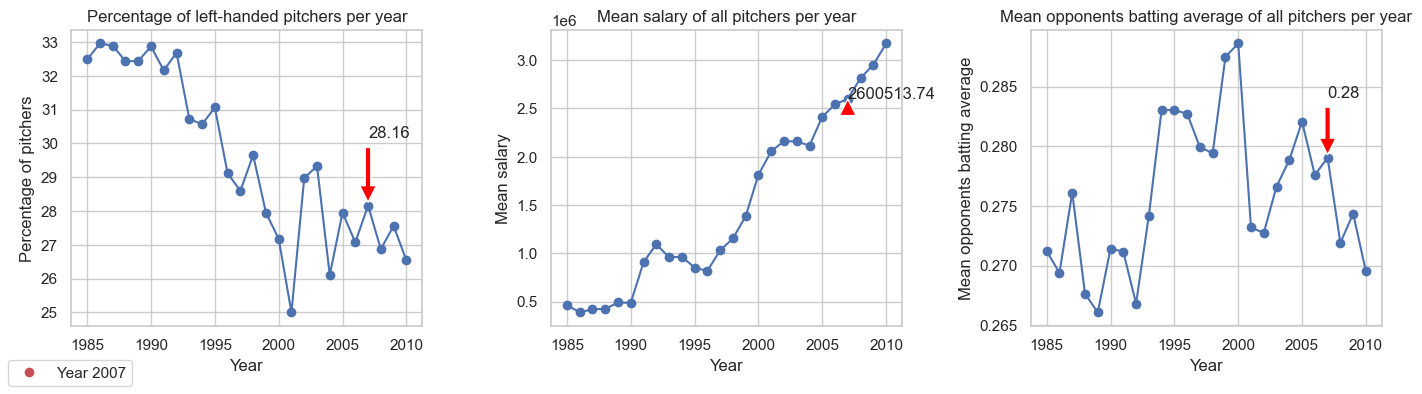

Percentage of left-handed pitchers in 2007: 28.16%
Mean salary of all pitchers in 2007: 2600513.74
Mean opponents batting average of all pitchers in 2007: 0.28


In [88]:
# Creating a figure with a specific size (14 units wide and 4 units tall)
fig, axs = plt.subplots(1, 3, figsize=(14, 4)) # 1 row, 3 columns since we want 3 subplots

# Defining data, titles and labels for each subplot
data = [proportion, mean_salary, mean_BAOpp]
titles = [
    'Percentage of left-handed pitchers per year',
    'Mean salary of all pitchers per year',
    'Mean opponents batting average of all pitchers per year'
]
ylabels = [
    'Percentage of pitchers',
    'Mean salary',
    'Mean opponents batting average'
]

highlighted_year = 2007

for i in range(3):
    # Select the current subplot
    ax = axs[i]
    
    # Create a line plot using the corresponding data
    ax.plot(data[i], marker='o')

    # Annotate the plot with a label for the year 2007 and an arrow pointing to the data point
    ax.annotate(f'{data[i][highlighted_year]:.2f}', xy=(highlighted_year, data[i][highlighted_year]),
                xytext=(highlighted_year, data[i][highlighted_year] + (2 if i == 0 else 0.005)), arrowprops=dict(facecolor='red', shrink=0.05))

    # Label the y-axis
    ax.set_ylabel(ylabels[i])

    # Label the x-axis
    ax.set_xlabel('Year')

    # Set a title for this subplot
    ax.set_title(titles[i])

# Add a common legend specifying that the red point represents the year 2007
fig.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='r', markersize=8, label='Year 2007')], loc='lower left')

# Automatically adjust subplot parameters to fit the figure area
plt.tight_layout()

# Display the figure
plt.show()

# Printing the results for the year 2007
print(f"Percentage of left-handed pitchers in 2007: {proportion[2007]:.2f}%")
print(f"Mean salary of all pitchers in 2007: {mean_salary[2007]:.2f}")
print(f"Mean opponents batting average of all pitchers in 2007: {mean_BAOpp[2007]:.2f}")

**3.3 —** Create a single plot with 10 inches of width and 4 inches of height. The plot should contain two panels: 
- Panel A: The average salary for left and right-handed pitchers per year, show 95% confidence intervals in your plot.
- Panel B: The average opponents' batting average for left and right-handed pitchers across the years, show 95% confidence intervals in your plot.


Additionally, print, for the year 1999:
- the average salary of left-handed pitchers.
- the average opponents' batting average of right-handed pitchers.

In [89]:
# Creating data frames for left and right-handed pitchers
df_LH = df[df.throws == 'L']
df_RH = df[df.throws == 'R']

# Creating data frames for left and right-handed pitchers mean salary per year
LH_m = df_LH.groupby(df_LH.yearID)['salary'].agg('mean') # .mean instead of agg('mean')
RH_m = df_RH.groupby(df_RH.yearID)['salary'].agg('mean')

# Creating data frames for left and right-handed pitchers salary standard error of the mean per year
sem_LH_m = df_LH.groupby(df_LH.yearID)['salary'].agg('sem')
sem_RH_m = df_RH.groupby(df_RH.yearID)['salary'].agg('sem')

# Creating data frames for left and right-handed pitchers mean opponents batting average per year
LH_oba = df_LH.groupby(df_LH.yearID)['BAOpp'].agg('mean')
RH_oba = df_RH.groupby(df_RH.yearID)['BAOpp'].agg('mean')

# Creating data frames for left and right-handed pitchers opponents batting average standard error of the mean per year
sem_LH_oba = df_LH.groupby(df_LH.yearID)['BAOpp'].agg('sem')
sem_RH_oba = df_RH.groupby(df_RH.yearID)['BAOpp'].agg('sem')

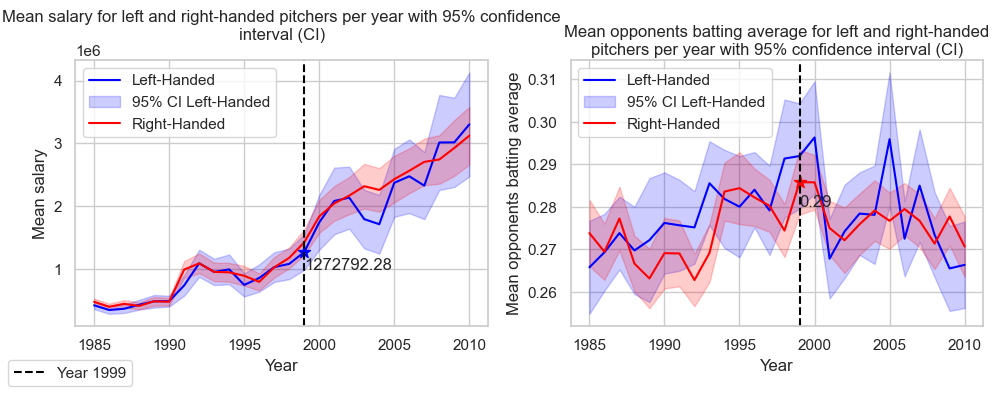

Mean salary of left-handed pitchers in 1999: 1272792.28
Mean opponents batting average of right-handed pitchers in 1999: 0.29


In [90]:
# Creating a figure with a specific size (10 inches wide and 4 inches tall)
fig, axs = plt.subplots(1, 2, figsize=(10, 4)) # 1 row, 2 columns since we want 2 subplots

# Data and labels for the panels
data = [LH_m, RH_m, LH_oba, RH_oba]
sem_data = [sem_LH_m, sem_RH_m, sem_LH_oba, sem_RH_oba]
labels = ["Left-Handed", "Right-Handed", "Left-Handed", "Right-Handed"]
colors = ["blue", "red", "blue", "red"]
titles = [
    "Mean salary",
    "Mean salary",
    "Mean opponents batting average",
    "Mean opponents batting average"
]
panel_titles = ['Mean salary for left and right-handed pitchers per year with 95% confidence interval (CI)', 
                'Mean opponents batting average for left and right-handed pitchers per year with 95% confidence interval (CI)']

# Loop over 4 items, with each pair of items representing one of the two panels (2 panels in total)
'''The pair in the loop represents the data for the two panels in the figure. Specifically, the loop iterates over the following items:
        The average salary data for left-handed pitchers.
        The average salary data for right-handed pitchers.
        The average opponents' batting average data for left-handed pitchers.
        The average opponents' batting average data for right-handed pitchers.
        Each pair of items (1 and 2, and 3 and 4) corresponds to one of the two panels in the figure, where the first pair represents Panel A, 
        and the second pair represents Panel B. '''

for i in range(4):
    ax = axs[i // 2]  # Select the appropriate panel

    sns.lineplot(x=data[i].index, y=data[i], label=labels[i], ax=ax, color=colors[i])
    ax.fill_between(data[i].index, y1=data[i] - 1.96 * sem_data[i], y2=data[i] + 1.96 * sem_data[i], alpha=0.2, color=colors[i], label='95% CI '+labels[i]) 

    ax.set_xlabel('Year')
    ax.set_ylabel(titles[i]) 
    ax.set_title(panel_titles[0] if i < 2 else panel_titles[1], wrap=True)

# Add a dashed line at 1999 in both panels
for ax in axs:
    ax.axvline(x=1999, linestyle='--', color='black', label="Year 1999")

# Add a shared legend specifying that the dashed line represents the year 1999
fig.legend(handles=[plt.Line2D([0], [0], color='black', markerfacecolor='black', markersize=8, label='Year 1999', linestyle='--')], loc='lower left')

# Annotate the value for the year 1999 for both left-handed and right-handed data
value_salary_LH_1999 = LH_m[1999]
value_oba_RH_1999 = RH_oba[1999]
# Add annotations with a point matching the color of the lineplot and value below             
axs[0].scatter(1999, value_salary_LH_1999, color=colors[0], s=80, marker='*')
axs[0].annotate(f'{value_salary_LH_1999:.2f}', xy=(1999, value_salary_LH_1999), xytext=(1999, 1e6))
axs[1].scatter(1999, value_oba_RH_1999, color=colors[1], s=80, marker='*')
axs[1].annotate(f'{value_oba_RH_1999:.2f}', xy=(1999, value_oba_RH_1999), xytext=(1999, 0.28))

# Automatically adjust subplot parameters to fit the figure area
plt.tight_layout()

# Display the figure
plt.show()

# Printing the results for the year 1999
print(f"Mean salary of left-handed pitchers in 1999: {value_salary_LH_1999:.2f}")
print(f"Mean opponents batting average of right-handed pitchers in 1999: {value_oba_RH_1999:.2f}")


**3.4 —** /Discuss:/ Contrast the results obtained in Tasks 3.1 / 3.3 / 3.3 with the results obtained in Tasks 2.7 and 2.8. Are left-handed better than right-handed pitchers? Do they earn better salaries? Explain why the analysis might have reached different results.

**3.5 —** Before showing the final results to Mr. Russo, you pass them by Ms. Sakota once more. She looks happier now, but still looks a bit concerned. She asks you to perform a sanity check on the missing data for the period you are considering. Specifically, she is worried that there are significantly more missing salaries for left-handed pitchers or for right-handed pitchers.

- Create a plot with 10 inches of width and 4 inches of height. The plot should depict the fraction of missing salary  salary for left and right-handed pitchers per year, show 95% confidence intervals in your plot. 
- Print the fraction of left-handed pitchers with salary data missing for the year 2002. 
- /Discuss:/ According to the plot, are there significantly more missing salaries for left-handed pitchers?


Before plotting, we start by extracting the data we need. We proceed this way:  
> **1)** Data filtering: we filter the initial dataset to keep only the rows where the salary is missing (NaN).  
> **2)** Grouping: we are interested in the fraction of missing salary for left and right-handed pitchers _per year_. Therefore, for both right and left-handed players, we group players per year using `yearID`.  
> **3)** 

In [91]:
#Filtering the data to keep only players that have missing salary values
filtered_missing_salary = df[df.salary.isnull() == True ]

#Total number of left-handed pitchers per year
df_LH_grouped = df_LH.groupby(df_LH.yearID)
total_LH = df_LH_grouped['salary'].agg('size')

#Number of left-handed pitchers with missing salary per year
filtered_missing_LH = filtered_missing_salary[filtered_missing_salary.throws == 'L']
missing_LH = filtered_missing_LH.groupby(filtered_missing_LH.yearID)['salary'].agg('size')

#fraction of missing salary for left-handed pitchers per year
prop_LH = missing_LH/ total_LH

#Total number of right-handed pitchers per year
df_RH_grouped = df_RH.groupby(df_RH.yearID)
total_RH = df_RH_grouped['salary'].agg('size')

#Number of right-handed pitchers with missing salary per year
filtered_missing_RH = filtered_missing_salary[filtered_missing_salary.throws == 'R']
missing_RH = filtered_missing_RH.groupby(filtered_missing_RH.yearID)['salary'].agg('size')

#fraction of missing salary for right-handed pitchers per year
prop_RH = missing_RH / total_RH

# Calculate the 95% confidence intervals for the fractions
confidence_LH = 1.96 * np.sqrt((prop_LH * (1 - prop_LH)) / total_LH)
confidence_RH = 1.96 * np.sqrt((prop_RH * (1 - prop_RH)) / total_RH)

# Creating data frames for fraction of missing salary for pitchers average standard error of the mean per year
sem_prop_LH = prop_LH.agg('sem')
sem_prop_RH = prop_RH.agg('sem')


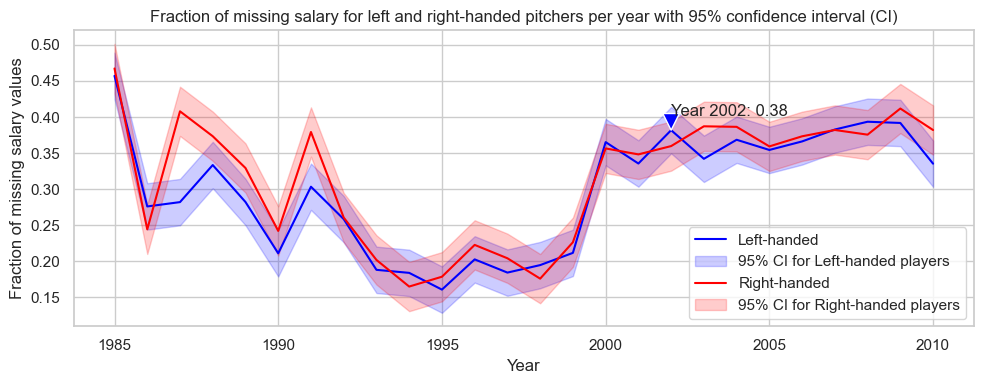

Fraction of missing salary values for left-handed pitchers in 2002: 0.38


In [92]:
# Creating a figure with a specific size (10 inches wide and 4 inches tall)
fig, ax = plt.subplots(figsize=(10, 4))

# Data and labels for the panels
colors = ['blue', 'red']
labels = ['Left-handed', 'Right-handed']
props = [prop_LH, prop_RH]
sems = [sem_prop_LH, sem_prop_RH]

# Looping over the left and right-handed pitchers and plotting the fraction of missing salary with confidence intervals for right and left-handed pitchers
for i in range(2):
    ax.plot(props[i].index, props[i], color=colors[i], label=labels[i])
    ax.fill_between(props[i].index, props[i] - 1.96 * sems[i], props[i] + 1.96 * sems[i], alpha=0.2, color=colors[i], label=f'95% CI for {labels[i]} players')

# Annotating the fraction of missing salary for left-handed pitchers in the year 2002
ax.annotate(f'Year 2002: {prop_LH[2002]:.2f}', 
            xy=(2002, prop_LH[2002]), 
            xytext=(2002, prop_LH[2002] + 0.02), 
            arrowprops=dict(facecolor='blue'))

ax.set_xlabel('Year')
ax.set_ylabel('Fraction of missing salary values')
ax.set_title('Fraction of missing salary for left and right-handed pitchers per year with 95% confidence interval (CI)')

# Show the legend
ax.legend(loc='lower right')

plt.tight_layout()

# Display the plot
plt.show()

# Printing the results for the year 2002
print(f"Fraction of missing salary values for left-handed pitchers in 2002: {prop_LH[2002]:.2f}")


**3.6 –**  /Discuss:/ If 95% of the salaries of right-handed pitchers were missing and none for the left-handed pitchers, what problem could you envision could happen downstream when you analyzed the data?